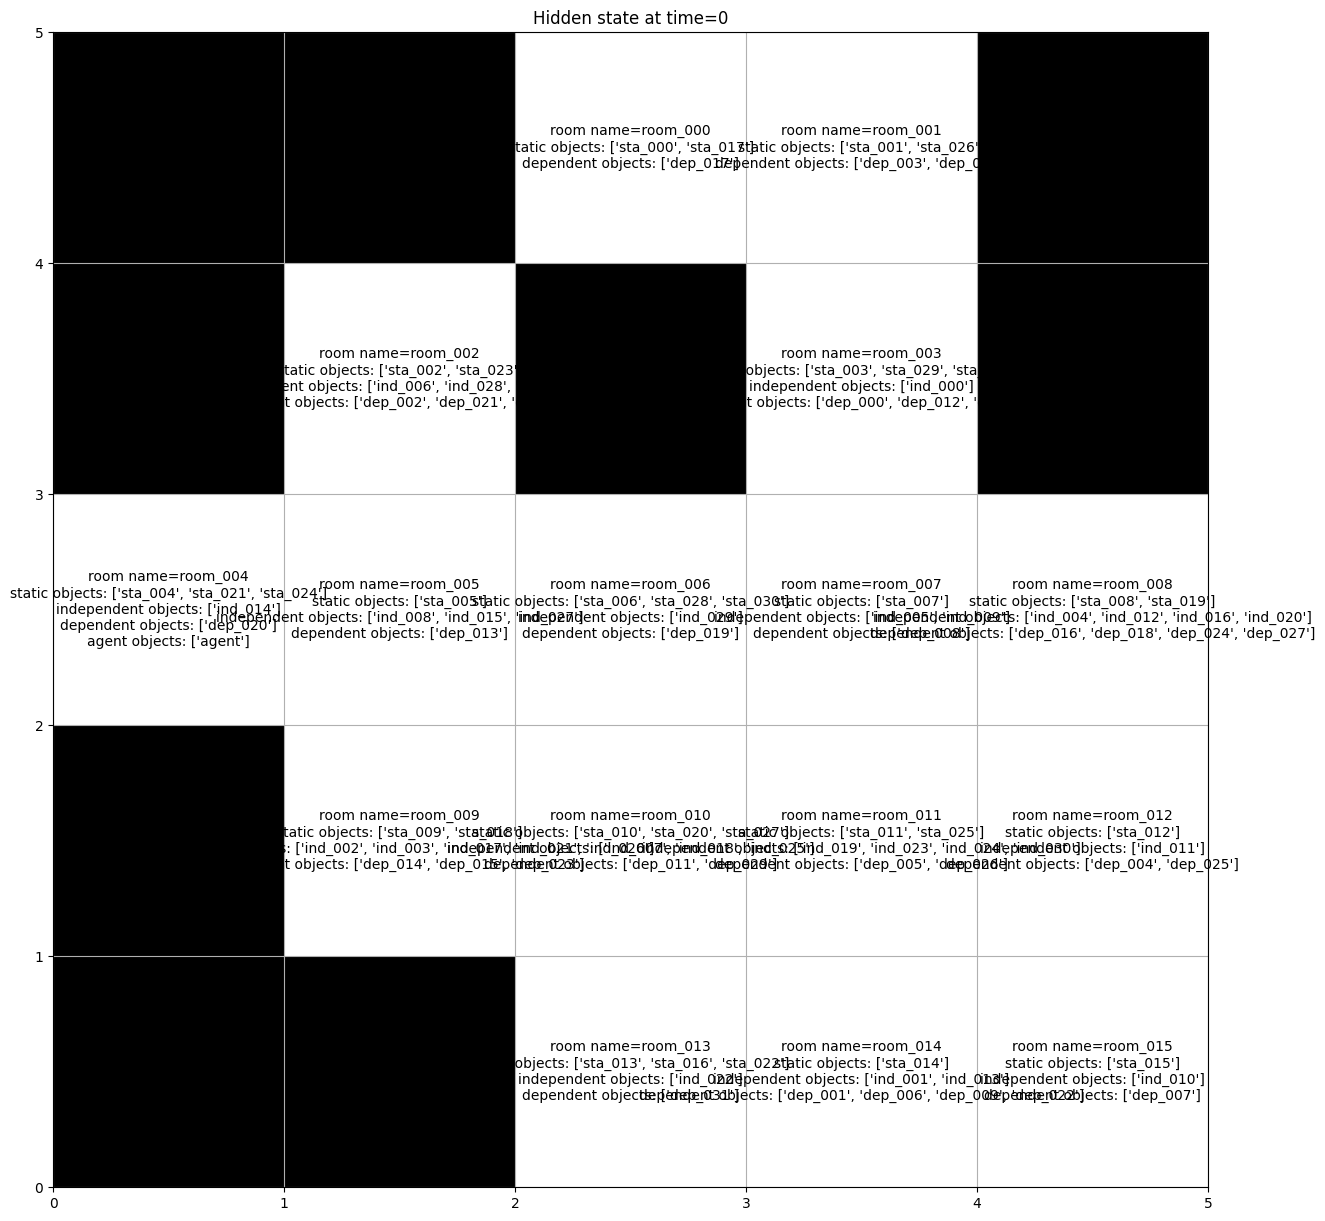

The number of room: 16
The number of static_objects: 32
The number of independent_objects: 32
The number of dependent_objects: 32

memory mgmt         qa                  explore             pretrain_semantic   mean      std       
--------------------------------------------------------------------------------------------------------------
random              episodic_semantic   avoid_walls         False               280.42    7.56      
random              episodic_semantic   random              False               255.56    10.5      
episodic            episodic_semantic   avoid_walls         False               197.84    1.56      
episodic            episodic_semantic   random              False               163.32    5.43      
semantic            episodic_semantic   avoid_walls         False               172.4     7.8       
semantic            episodic_semantic   random              False               167.7     7.35      


In [22]:
%matplotlib inline
from agent import HandcraftedAgent
from tqdm.auto import tqdm
import numpy as np
import random
import logging
from room_env.envs.room2 import RoomEnv2

logger = logging.getLogger()
logger.disabled = True


for room_size in ["xl"]:

    capacity = {
        "episodic": 64,
        "episodic_agent": 0,
        "semantic": 64,
        "semantic_map": 0,
        "short": 1,
    }

    config = {
        "question_prob": 1.0,
        "terminates_at": 99,
        "randomize_observations": True,
        "room_size": room_size,
        "rewards": {"correct": 1, "wrong": 0, "partial": 0},
        "make_everything_static": False,
        "num_total_questions": 1000,
        "question_interval": 1,
            
    }

    results = {}

    for mm_policy in ["random", "episodic", "semantic"]:
        for qa_policy in ["episodic_semantic"]:
            for explore_policy in ["avoid_walls", "random"]:
                for pretrain_semantic in [False]:
                    key = (
                        mm_policy,
                        qa_policy,
                        explore_policy,
                        pretrain_semantic,
                    )
                    if key not in results:
                        results[key] = []
                    print(key)

                    for seed in tqdm([0, 1, 2, 3, 4]):
                        agent = HandcraftedAgent(
                            env_str="room_env:RoomEnv-v2",
                            env_config={**config, "seed": seed},
                            mm_policy=mm_policy,
                            qa_policy=qa_policy,
                            explore_policy=explore_policy,
                            num_samples_for_results=10,
                            capacity=capacity,
                            pretrain_semantic=pretrain_semantic,
                            default_root_dir="./training_results/mem-16",
                        )
                        agent.test()
                        agent.remove_results_from_disk()
                        to_append = (np.mean(agent.scores), np.std(agent.scores))
                        # print(to_append)
                        results[key].append(to_append)


    env = RoomEnv2(**config)
    observations, info = env.reset()
    env.render("image")
    for key, val in env.names.items():
        print(f"The number of {key}: {len(val)}")

    print(
        f"\n{'memory mgmt':<20}{'qa':<20}{'explore':<20}{'pretrain_semantic':<20}{'mean':<10}{'std':<10}"
    )
    print(f"-" * 110)
    for key, val in results.items():
        print(
            f"{str(key[0]):<20}{str(key[1]):<20}{str(key[2]):<20}{str(key[3]):<20}{round(np.mean([v[0] for v in val]), 2):<10}{round(np.std([v[0] for v in val]), 2):<10}"
        )

In [23]:
agent.env.answers_all

[[{'current': 'room_004', 'previous': None},
  {'current': 'room_015', 'previous': None},
  {'current': 'room_008', 'previous': None},
  {'current': 'room_006', 'previous': None},
  {'current': 'room_013', 'previous': None},
  {'current': 'room_015', 'previous': None},
  {'current': 'room_011', 'previous': None},
  {'current': 'room_008', 'previous': None},
  {'current': 'room_008', 'previous': None},
  {'current': 'room_004', 'previous': None}],
 [{'current': 'room_009', 'previous': None},
  {'current': 'room_008', 'previous': None},
  {'current': 'room_004', 'previous': None},
  {'current': 'room_013', 'previous': None},
  {'current': 'room_008', 'previous': None},
  {'current': 'room_009', 'previous': None},
  {'current': 'room_001', 'previous': None},
  {'current': 'room_009', 'previous': None},
  {'current': 'room_003', 'previous': None},
  {'current': 'room_014', 'previous': None}],
 [{'current': 'room_003', 'previous': None},
  {'current': 'room_005', 'previous': 'room_002'},
  